# Modeling7: 이상치 수정

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터 불러오기
data_origin = pd.read_csv("https://raw.githubusercontent.com/agtechresearch/LectureAlgorithm/main/csv/married_full.csv")
data_origin

,gender,age,age_partner,importance_same_religion,pref_of_partner_attractive,pref_of_partner_sincere,pref_of_partner_intelligence,pref_of_partner_funny,pref_of_partner_ambitious,pref_of_partner_shared_interests,...,my_eval_sincere,my_eval_intelligence,my_eval_funny,my_eval_ambition,my_eval_shared_interests,interests_correlate,expected_happy_with_couple_match,how_much_i_liked,guess_prob_liked,married
0,female,21.0,27.0,4.0,35.0,20.0,20.0,20.0,0.0,5.0,...,9.0,7.0,7.0,6.0,5.0,0.14,3.0,7.0,6.0,0
1,female,21.0,22.0,4.0,60.0,0.0,0.0,40.0,0.0,0.0,...,8.0,7.0,8.0,5.0,6.0,0.54,3.0,7.0,5.0,0
2,female,21.0,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,...,8.0,9.0,8.0,5.0,7.0,0.16,3.0,7.0,5.0,1
3,female,21.0,23.0,4.0,30.0,5.0,15.0,40.0,5.0,5.0,...,6.0,8.0,7.0,6.0,8.0,0.61,3.0,7.0,6.0,1
4,female,21.0,24.0,4.0,30.0,10.0,20.0,10.0,10.0,20.0,...,6.0,7.0,7.0,6.0,6.0,0.21,3.0,6.0,6.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8357,male,25.0,26.0,1.0,10.0,10.0,30.0,20.0,10.0,15.0,...,5.0,5.0,5.0,NaN,NaN,0.64,10.0,2.0,5.0,0
8358,male,25.0,24.0,1.0,50.0,20.0,10.0,5.0,10.0,5.0,...,6.0,8.0,4.0,4.0,NaN,0.71,10.0,4.0,4.0,0
8359,male,25.0,29.0,1.0,40.0,10.0,30.0,10.0,10.0,NaN,...,7.0,8.0,8.0,8.0,NaN,-0.46,10.0,6.0,5.0,0
8360,male,25.0,22.0,1.0,10.0,25.0,25.0,10.0,10.0,20.0,...,6.0,5.0,4.0,NaN,5.0,0.62,10.0,5.0,5.0,0


In [3]:
# 전처리를 위한 원본 데이터 복사
data = data_origin.copy()

In [4]:
# 메모리를 효율적으로 사용하기 위한 downcast 함수 정의
def downcast(df, verbose=True):     # verbose 옵션 추가: (True)인 경우 몇 퍼센트 압축됐는지 출력
    start_mem = df.memory_usage().sum() / 1024**2   # 초기 메모리 사용량
    for col in df.columns:
        dtype_name = df[col].dtype.name
        if dtype_name == 'object':
            pass
        elif dtype_name == 'bool':
            df[col] = df[col].astype('int8')
        elif dtype_name.startswith('int') or (df[col].round() == df[col]).all():
            df[col] = pd.to_numeric(df[col], downcast='integer')
        else:
            df[col] = pd.to_numeric(df[col], downcast='float')
    end_mem = df.memory_usage().sum() / 1024**2

    if verbose:
        print(f'{(100*(start_mem - end_mem) / start_mem):.1f}% 압축됨')

    return df

In [5]:
downcast(data)

49.6% 압축됨


,gender,age,age_partner,importance_same_religion,pref_of_partner_attractive,pref_of_partner_sincere,pref_of_partner_intelligence,pref_of_partner_funny,pref_of_partner_ambitious,pref_of_partner_shared_interests,...,my_eval_sincere,my_eval_intelligence,my_eval_funny,my_eval_ambition,my_eval_shared_interests,interests_correlate,expected_happy_with_couple_match,how_much_i_liked,guess_prob_liked,married
0,female,21.0,27.0,4.0,35.0,20.0,20.0,20.0,0.0,5.0,...,9.0,7.0,7.0,6.0,5.0,0.14,3.0,7.0,6.0,0
1,female,21.0,22.0,4.0,60.0,0.0,0.0,40.0,0.0,0.0,...,8.0,7.0,8.0,5.0,6.0,0.54,3.0,7.0,5.0,0
2,female,21.0,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,...,8.0,9.0,8.0,5.0,7.0,0.16,3.0,7.0,5.0,1
3,female,21.0,23.0,4.0,30.0,5.0,15.0,40.0,5.0,5.0,...,6.0,8.0,7.0,6.0,8.0,0.61,3.0,7.0,6.0,1
4,female,21.0,24.0,4.0,30.0,10.0,20.0,10.0,10.0,20.0,...,6.0,7.0,7.0,6.0,6.0,0.21,3.0,6.0,6.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8357,male,25.0,26.0,1.0,10.0,10.0,30.0,20.0,10.0,15.0,...,5.0,5.0,5.0,NaN,NaN,0.64,10.0,2.0,5.0,0
8358,male,25.0,24.0,1.0,50.0,20.0,10.0,5.0,10.0,5.0,...,6.0,8.0,4.0,4.0,NaN,0.71,10.0,4.0,4.0,0
8359,male,25.0,29.0,1.0,40.0,10.0,30.0,10.0,10.0,NaN,...,7.0,8.0,8.0,8.0,NaN,-0.46,10.0,6.0,5.0,0
8360,male,25.0,22.0,1.0,10.0,25.0,25.0,10.0,10.0,20.0,...,6.0,5.0,4.0,NaN,5.0,0.62,10.0,5.0,5.0,0


> Train/Test data split

In [6]:
# 단순 랜덤 샘플링
#from sklearn.model_selection import train_test_split

#train_set, test_set = train_test_split(data, test_size = 0.2, random_state=42)


# 계층적 샘플링
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data, data['married']):
    sss_train_set = data.loc[train_index]
    sss_test_set = data.loc[test_index]

In [7]:
X_train = sss_train_set.drop("married", axis=1)
y_train = sss_train_set["married"].copy()

X_test = sss_test_set.drop("married", axis=1)
y_test = sss_test_set["married"].copy()

# Preprocessing

In [8]:
X_train

,gender,age,age_partner,importance_same_religion,pref_of_partner_attractive,pref_of_partner_sincere,pref_of_partner_intelligence,pref_of_partner_funny,pref_of_partner_ambitious,pref_of_partner_shared_interests,...,my_eval_attractive,my_eval_sincere,my_eval_intelligence,my_eval_funny,my_eval_ambition,my_eval_shared_interests,interests_correlate,expected_happy_with_couple_match,how_much_i_liked,guess_prob_liked
3484,male,28.0,24.0,9.0,15.000000,20.000000,15.00,20.00,15.00,15.00,...,4.0,6.0,7.0,2.0,2.0,1.0,0.07,5.0,4.0,2.0
4669,male,25.0,33.0,8.0,20.000000,25.000000,25.00,10.00,15.00,5.00,...,6.0,8.0,7.0,5.0,5.0,5.0,0.17,6.0,6.0,4.0
1616,male,28.0,23.0,6.0,15.000000,15.000000,20.00,15.00,20.00,15.00,...,6.0,8.0,8.0,7.0,6.0,6.0,0.52,6.0,6.0,5.0
147,male,24.0,25.0,1.0,9.090000,18.180000,27.27,18.18,18.18,9.09,...,9.0,9.0,8.0,9.0,5.0,7.0,-0.23,5.0,9.0,7.0
6819,female,26.0,27.0,1.0,40.000000,20.000000,20.00,10.00,10.00,0.00,...,1.0,5.0,5.0,1.0,5.0,1.0,-0.34,5.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7560,female,27.0,24.0,3.0,20.000000,16.000000,16.00,17.00,16.00,15.00,...,5.0,8.0,7.0,7.0,7.0,6.0,-0.05,2.0,6.0,6.0
2714,female,25.0,27.0,1.0,7.500000,17.500000,20.00,22.50,12.50,20.00,...,3.0,7.0,7.0,6.0,NaN,NaN,0.15,5.0,6.0,6.0
2055,female,27.0,22.0,3.0,18.370001,18.370001,20.41,20.41,16.33,6.12,...,5.0,8.0,8.0,6.0,7.0,7.0,-0.15,5.0,7.0,7.0
3512,male,25.0,34.0,1.0,10.000000,20.000000,20.00,20.00,20.00,10.00,...,5.0,6.0,8.0,5.0,6.0,3.0,0.27,6.0,6.0,6.0


In [9]:
# gender OHE
X_train = pd.get_dummies(X_train, columns=['gender'], drop_first=True)

In [10]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(random_state=42)
X_train_imputed = imputer.fit_transform(X_train)
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns)

c:\Users\prohe\anaconda3\envs\py38\lib\site-packages\sklearn\impute\_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [11]:
X_train_imputed

,age,age_partner,importance_same_religion,pref_of_partner_attractive,pref_of_partner_sincere,pref_of_partner_intelligence,pref_of_partner_funny,pref_of_partner_ambitious,pref_of_partner_shared_interests,eval_by_partner_attractive,...,my_eval_sincere,my_eval_intelligence,my_eval_funny,my_eval_ambition,my_eval_shared_interests,interests_correlate,expected_happy_with_couple_match,how_much_i_liked,guess_prob_liked,gender_male
0,28.0,24.0,9.0,15.000000,20.000000,15.00,20.00,15.00,15.00,7.0,...,6.0,7.0,2.0,2.00000,1.000000,0.07,5.0,4.0,2.0,1.0
1,25.0,33.0,8.0,20.000000,25.000000,25.00,10.00,15.00,5.00,7.0,...,8.0,7.0,5.0,5.00000,5.000000,0.17,6.0,6.0,4.0,1.0
2,28.0,23.0,6.0,15.000000,15.000000,20.00,15.00,20.00,15.00,4.0,...,8.0,8.0,7.0,6.00000,6.000000,0.52,6.0,6.0,5.0,1.0
3,24.0,25.0,1.0,9.090000,18.180000,27.27,18.18,18.18,9.09,6.0,...,9.0,8.0,9.0,5.00000,7.000000,-0.23,5.0,9.0,7.0,1.0
4,26.0,27.0,1.0,40.000000,20.000000,20.00,10.00,10.00,0.00,7.0,...,5.0,5.0,1.0,5.00000,1.000000,-0.34,5.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6684,27.0,24.0,3.0,20.000000,16.000000,16.00,17.00,16.00,15.00,9.0,...,8.0,7.0,7.0,7.00000,6.000000,-0.05,2.0,6.0,6.0,0.0
6685,25.0,27.0,1.0,7.500000,17.500000,20.00,22.50,12.50,20.00,8.0,...,7.0,7.0,6.0,6.50994,5.314748,0.15,5.0,6.0,6.0,0.0
6686,27.0,22.0,3.0,18.370001,18.370001,20.41,20.41,16.33,6.12,5.0,...,8.0,8.0,6.0,7.00000,7.000000,-0.15,5.0,7.0,7.0,0.0
6687,25.0,34.0,1.0,10.000000,20.000000,20.00,20.00,20.00,10.00,6.0,...,6.0,8.0,5.0,6.00000,3.000000,0.27,6.0,6.0,6.0,1.0


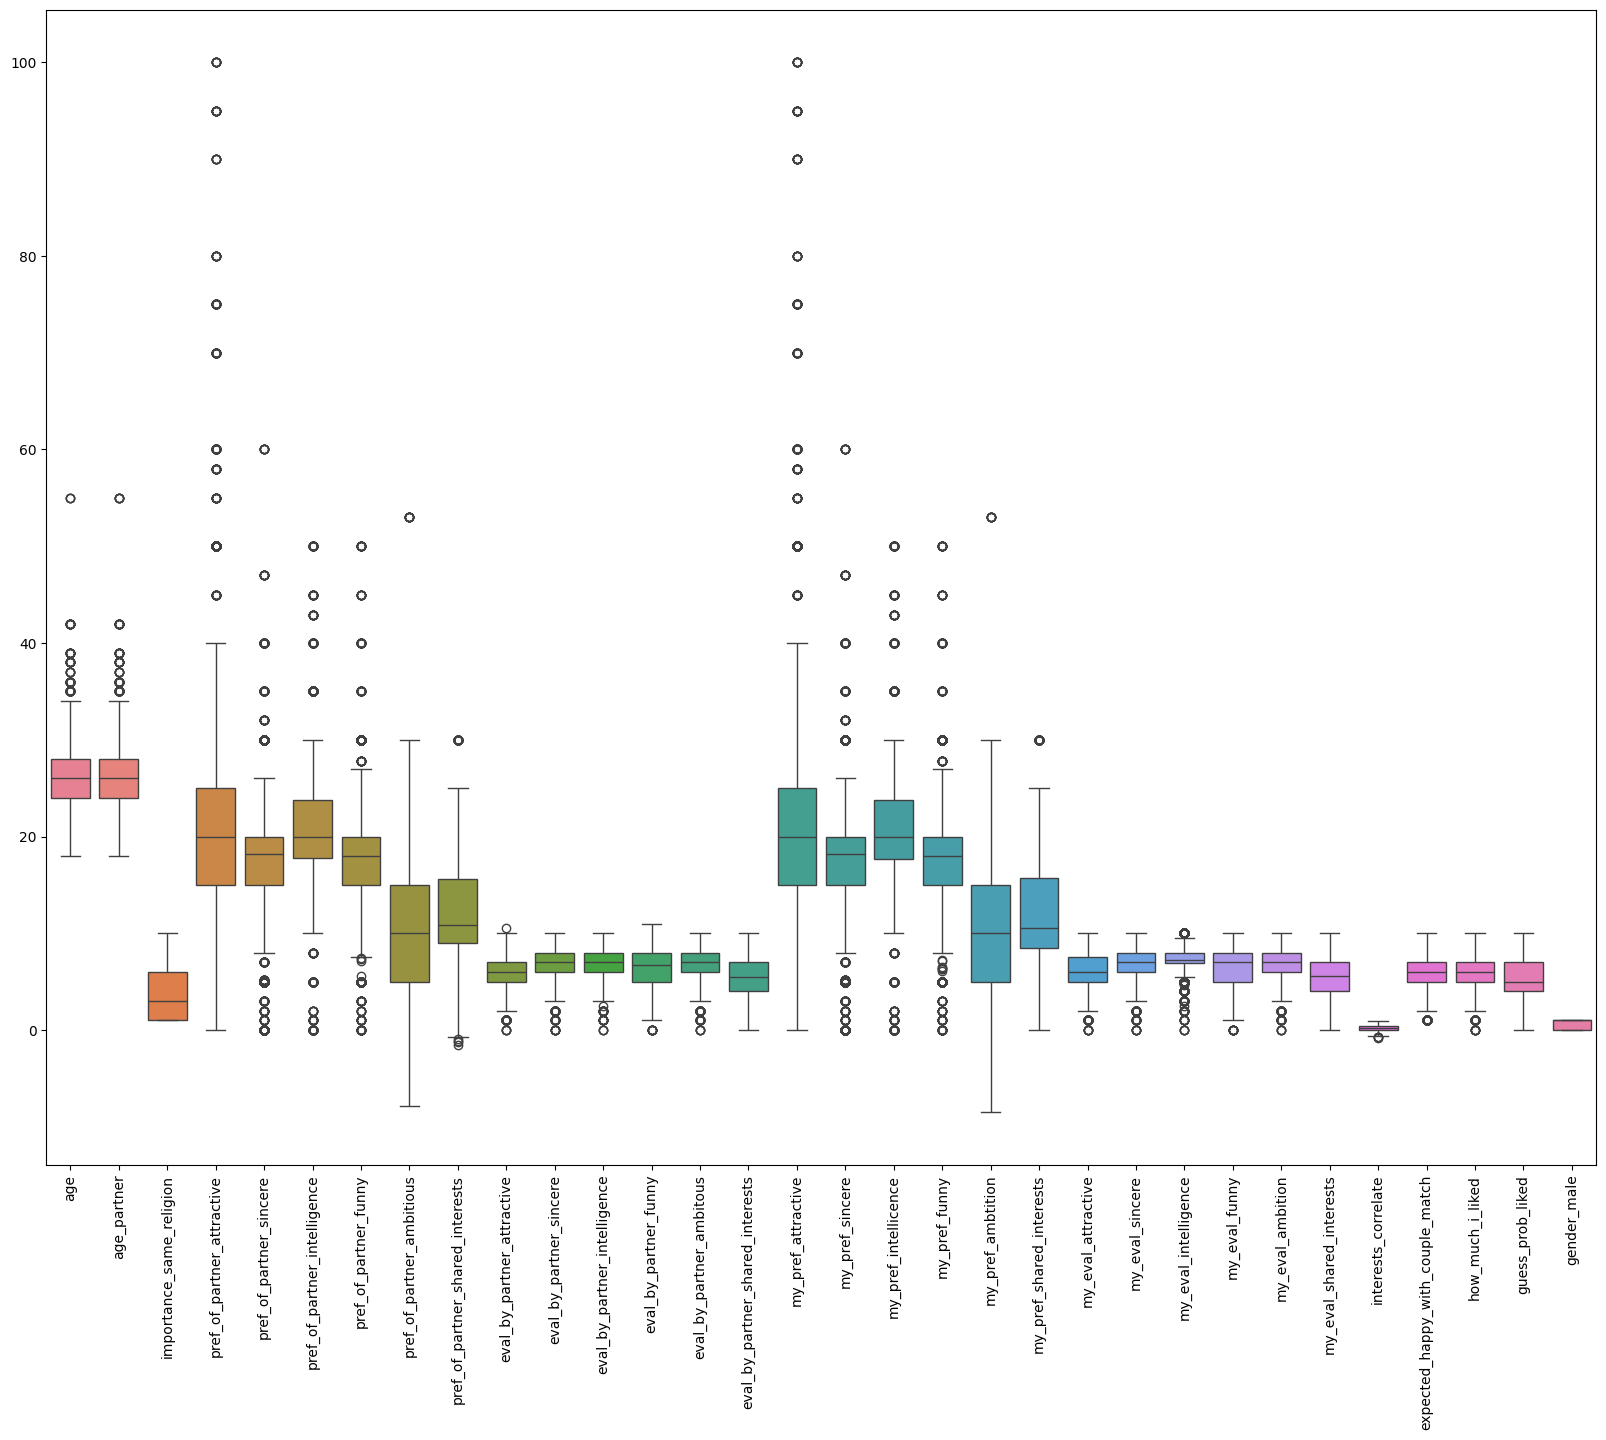

In [12]:
# 모든 feature들의 boxplot 그리기
plt.figure(figsize=(20, 15))
sns.boxplot(data=X_train_imputed)
plt.xticks(rotation=90)
plt.show()

In [15]:
num_attribs = X_train.columns[:-1]     # 수치형 column 지정
cat_attribs = ['gender_male']    # 범주형 column 지정

In [17]:
X_train_imputed[num_attribs]

,age,age_partner,importance_same_religion,pref_of_partner_attractive,pref_of_partner_sincere,pref_of_partner_intelligence,pref_of_partner_funny,pref_of_partner_ambitious,pref_of_partner_shared_interests,eval_by_partner_attractive,...,my_eval_attractive,my_eval_sincere,my_eval_intelligence,my_eval_funny,my_eval_ambition,my_eval_shared_interests,interests_correlate,expected_happy_with_couple_match,how_much_i_liked,guess_prob_liked
0,28.0,24.0,9.0,15.000000,20.000000,15.00,20.00,15.00,15.00,7.0,...,4.0,6.0,7.0,2.0,2.00000,1.000000,0.07,5.0,4.0,2.0
1,25.0,33.0,8.0,20.000000,25.000000,25.00,10.00,15.00,5.00,7.0,...,6.0,8.0,7.0,5.0,5.00000,5.000000,0.17,6.0,6.0,4.0
2,28.0,23.0,6.0,15.000000,15.000000,20.00,15.00,20.00,15.00,4.0,...,6.0,8.0,8.0,7.0,6.00000,6.000000,0.52,6.0,6.0,5.0
3,24.0,25.0,1.0,9.090000,18.180000,27.27,18.18,18.18,9.09,6.0,...,9.0,9.0,8.0,9.0,5.00000,7.000000,-0.23,5.0,9.0,7.0
4,26.0,27.0,1.0,40.000000,20.000000,20.00,10.00,10.00,0.00,7.0,...,1.0,5.0,5.0,1.0,5.00000,1.000000,-0.34,5.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6684,27.0,24.0,3.0,20.000000,16.000000,16.00,17.00,16.00,15.00,9.0,...,5.0,8.0,7.0,7.0,7.00000,6.000000,-0.05,2.0,6.0,6.0
6685,25.0,27.0,1.0,7.500000,17.500000,20.00,22.50,12.50,20.00,8.0,...,3.0,7.0,7.0,6.0,6.50994,5.314748,0.15,5.0,6.0,6.0
6686,27.0,22.0,3.0,18.370001,18.370001,20.41,20.41,16.33,6.12,5.0,...,5.0,8.0,8.0,6.0,7.00000,7.000000,-0.15,5.0,7.0,7.0
6687,25.0,34.0,1.0,10.000000,20.000000,20.00,20.00,20.00,10.00,6.0,...,5.0,6.0,8.0,5.0,6.00000,3.000000,0.27,6.0,6.0,6.0


In [19]:
# boxplot 기준의 이상치 수정
Q1 = X_train_imputed[num_attribs].quantile(0.25)
Q3 = X_train_imputed[num_attribs].quantile(0.75)
IQR = Q3 - Q1

# 낮은 이상치는 최소값, 높은 이상치는 최대값으로 대체
for i in num_attribs:
    X_train_imputed.loc[X_train_imputed[i] < Q1[i] - 1.5 * IQR[i], i] = Q1[i] - 1.5 * IQR[i]
    X_train_imputed.loc[X_train_imputed[i] > Q3[i] + 1.5 * IQR[i], i] = Q3[i] + 1.5 * IQR[i]

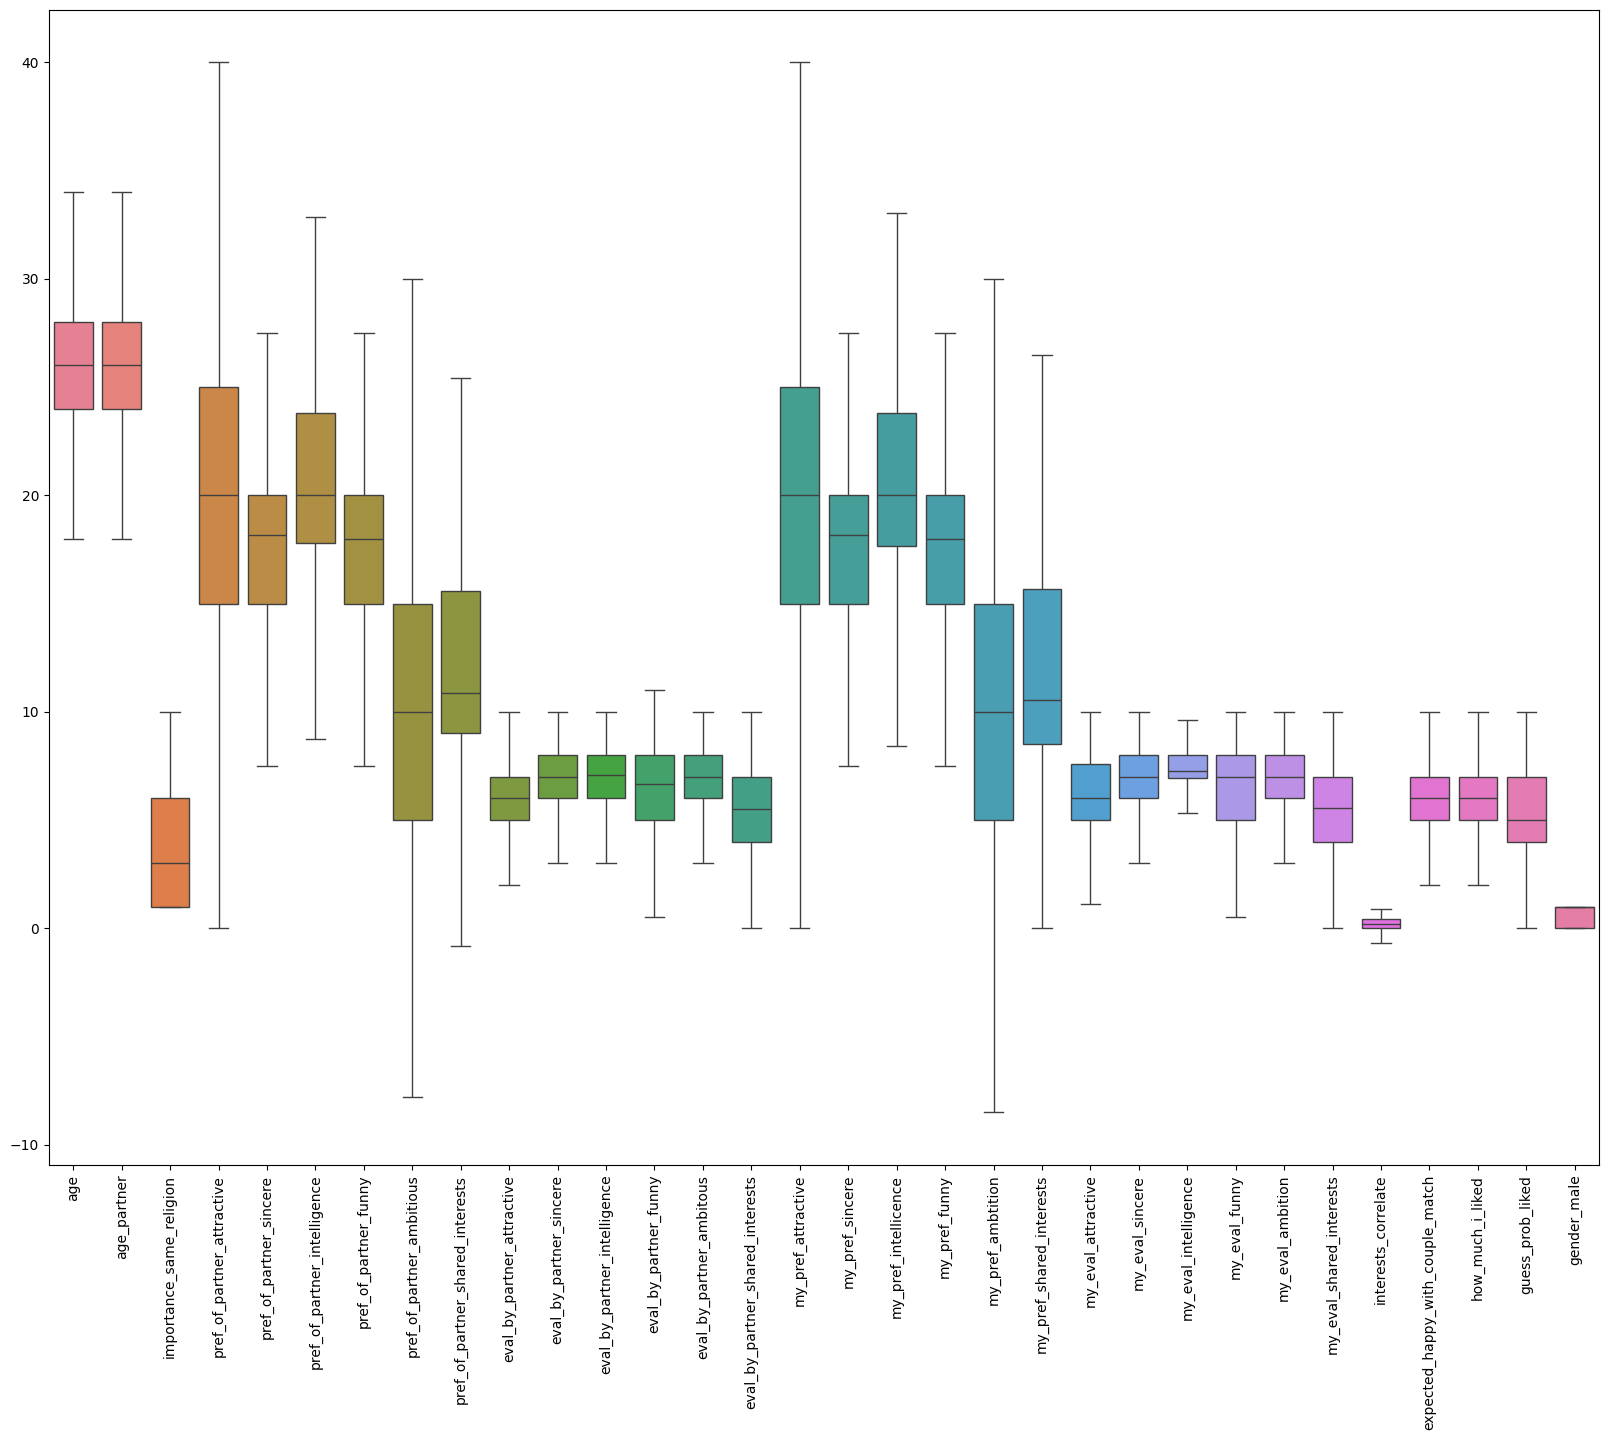

In [21]:
# 모든 feature들의 boxplot 그리기
plt.figure(figsize=(20, 15))
sns.boxplot(data=X_train_imputed)
plt.xticks(rotation=90)
plt.show()

In [22]:
# 수치형 변수 표준화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_imputed.columns)

In [23]:
X_train_scaled

,age,age_partner,importance_same_religion,pref_of_partner_attractive,pref_of_partner_sincere,pref_of_partner_intelligence,pref_of_partner_funny,pref_of_partner_ambitious,pref_of_partner_shared_interests,eval_by_partner_attractive,...,my_eval_sincere,my_eval_intelligence,my_eval_funny,my_eval_ambition,my_eval_shared_interests,interests_correlate,expected_happy_with_couple_match,how_much_i_liked,guess_prob_liked,gender_male
0,0.515873,-0.686748,1.918188,-0.692794,0.484953,-0.935356,0.522372,0.717284,0.525105,0.431246,...,-0.732750,-0.341818,-2.318409,-2.284474,-2.186475,-0.417822,-0.323867,-1.214351,-1.542458,0.990033
1,-0.390614,2.051169,1.560269,-0.141632,1.400095,0.853638,-1.434458,0.717284,-1.076586,0.431246,...,0.489289,-0.341818,-0.745168,-1.086829,-0.238213,-0.085457,0.262046,-0.088449,-0.585638,0.990033
2,0.515873,-0.990962,0.844430,-0.692794,-0.430189,-0.040859,-0.456043,1.548153,0.525105,-1.161355,...,0.489289,0.443904,0.303659,-0.488007,0.248853,1.077821,0.262046,-0.088449,-0.107229,0.990033
3,-0.692776,-0.382535,-0.945168,-1.344268,0.151841,1.259740,0.166229,1.245716,-0.421494,-0.099621,...,1.100308,0.443904,1.352487,-1.086829,0.735918,-1.414917,-0.323867,1.600404,0.849591,0.990033
4,-0.088451,0.225891,-0.945168,2.063018,0.484953,-0.040859,-1.434458,-0.113585,-1.877432,0.431246,...,-1.343770,-1.669969,-2.842822,-1.086829,-2.186475,-1.780519,-0.323867,-2.340253,-2.020868,-1.010067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6684,0.213711,-0.686748,-0.229329,-0.141632,-0.247161,-0.756456,-0.064677,0.883458,0.525105,1.492981,...,0.489289,-0.341818,0.303659,0.110816,0.248853,-0.816660,-2.081603,-0.088449,0.371181,-1.010067
6685,-0.390614,0.225891,-0.945168,-1.519538,0.027382,-0.040859,1.011580,0.301850,1.325951,0.962113,...,-0.121731,-0.341818,-0.220754,-0.182643,-0.084910,-0.151930,-0.323867,-0.088449,0.371181,-1.010067
6686,0.213711,-1.295175,-0.229329,-0.321311,0.186617,0.032490,0.602602,0.938295,-0.897197,-0.630488,...,0.489289,0.443904,-0.220754,0.110816,0.735918,-1.149025,-0.323867,0.474502,0.849591,-1.010067
6687,-0.390614,2.355382,-0.945168,-1.243957,0.484953,-0.040859,0.522372,1.548153,-0.275741,-0.099621,...,-0.732750,0.443904,-0.745168,-0.488007,-1.212344,0.246908,0.262046,-0.088449,0.371181,0.990033


In [24]:
# SMOTE-Tomek 샘플링
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

smoteto = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X_resampled, y_resampled = smoteto.fit_resample(X_train_scaled, y_train)

In [25]:
X_resampled.shape, y_resampled.shape

((10955, 32), (10955,))

> 기본적인 데이터셋 준비 완료

# Model Training

In [26]:
# lightgbm 모델 학습
from lightgbm import LGBMClassifier

params = {
    'n_estimators': 300,        #* 반복 수행하려는 트리의 개수 (너무 크면 오버피팅 발생)
    'max_depth': 8,             #* 트리의 최대 깊이 (너무 크면 오버피팅 발생)   # 보통 3~12(가장 민감하므로 먼저 튜닝해야할 값) # lightgbm처럼 leaf-wise로 학습하는 경우 끝까지(-1)도 괜찮다고 한다.
    # 'boosting_type' = 'gbdt'  # 부스팅 타입 (gbdt: Gradient Boosting Decision Tree, rf: RandomForest)
    'num_leaves': 16,           #* 하나의 트리가 가질 수 있는 최대 리프 수 (2번째로 민감. max_depth와 함께 튜닝)
    'learning_rate': 0.1,       # 부스팅 스탭 반복할 때 학습률(0~1) #튜닝시 0.1~0.3, 최종 모형은 0.05 이하
}

lgbm = LGBMClassifier(**params, objective='binary', metric='accuracy', random_state=42, verbose=0)
lgbm.fit(X_resampled, y_resampled)

LGBMClassifier(max_depth=8, metric='accuracy', n_estimators=300, num_leaves=16,
               objective='binary', random_state=42, verbose=0)

In [27]:
# Train data 성능 평가
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

y_train_pred = lgbm.predict(X_resampled)
print("<<Train Set Performance>>")
print("Accuracy: ", accuracy_score(y_resampled, y_train_pred))
print("F1 Score: ", f1_score(y_resampled, y_train_pred))
print(confusion_matrix(y_resampled, y_train_pred))

<<Train Set Performance>>
Accuracy:  0.982108626198083
F1 Score:  0.98189543691114
[[5444   32]
 [ 164 5315]]


In [33]:
# Test data 전처리
X_test = pd.get_dummies(X_test, columns=['gender'], drop_first=True)
X_test_imputed = imputer.transform(X_test)
X_test_imputed = pd.DataFrame(X_test_imputed, columns=X_test.columns)

for i in num_attribs:
    X_test_imputed.loc[X_test_imputed[i] < Q1[i] - 1.5 * IQR[i], i] = Q1[i] - 1.5 * IQR[i]
    X_test_imputed.loc[X_test_imputed[i] > Q3[i] + 1.5 * IQR[i], i] = Q3[i] + 1.5 * IQR[i]

X_test_scaled = scaler.transform(X_test_imputed)

In [35]:
X_test_scaled.shape

(1673, 32)

In [36]:
# Test data 성능 평가
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

y_test_pred = lgbm.predict(X_test_scaled)
print("<<Test Set Performance>>")
print("Accuracy: ", accuracy_score(y_test, y_test_pred))
print("F1 Score: ", f1_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

<<Test Set Performance>>
Accuracy:  0.844590555887627
F1 Score:  0.5094339622641509
[[1278   92]
 [ 168  135]]
